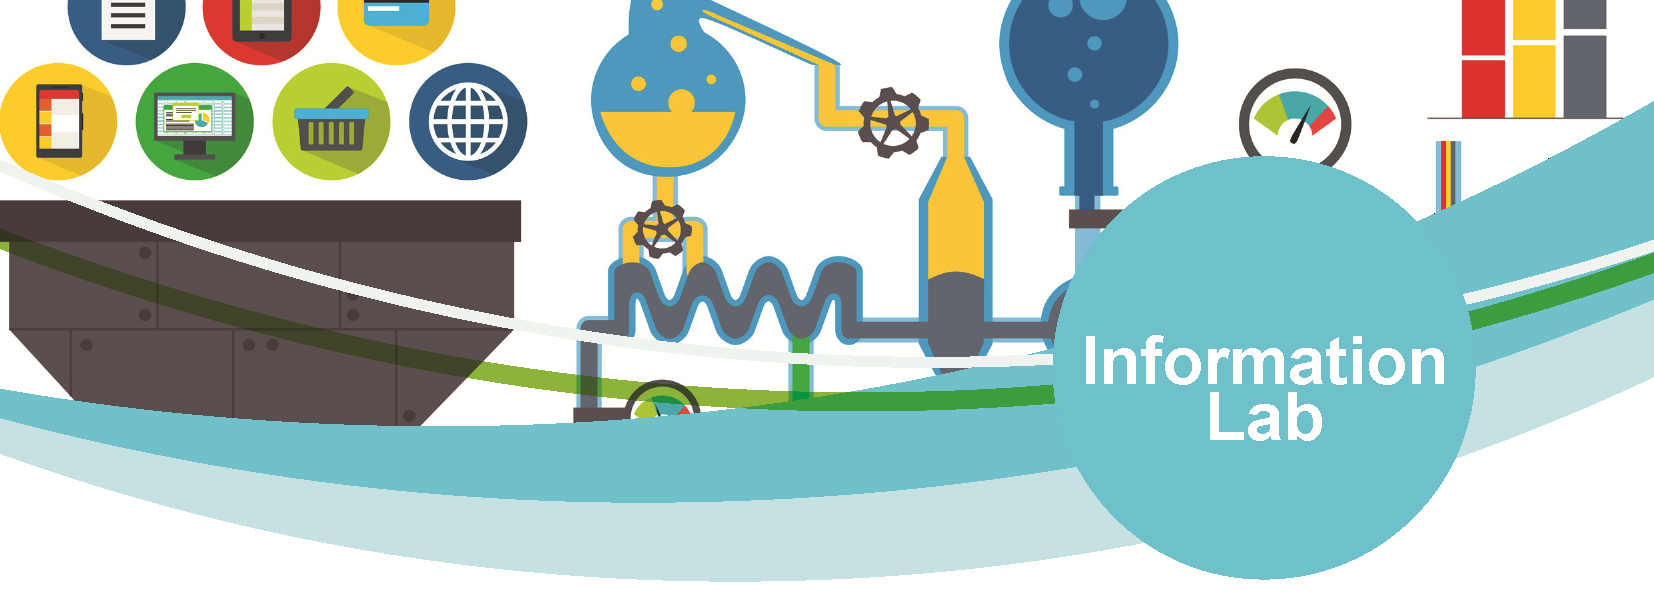

<h1>Python Plots - Correlation</h1>

Examples of graphs used for Correlations using the MatplotLib and Seaborn Python Packages.

Prepared by: Lee Matthews <br>

Source Material: <br>
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Data Dictionaries: <br>
https://ggplot2.tidyverse.org/reference/midwest.html<br>
https://ggplot2.tidyverse.org/reference/mpg.html<br>
http://www.sthda.com/english/wiki/r-built-in-data-sets#mtcars-motor-trend-car-road-tests<br>
https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
# Setup - Limited parts needed per plot.


import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.0.2
0.7.1


To run the code below you will need to map //finbilab01/COP_Repo to a lettered drive (I have used E:) as shown in the images below or alternatively download the data to your local drive and repoint the code to find them.

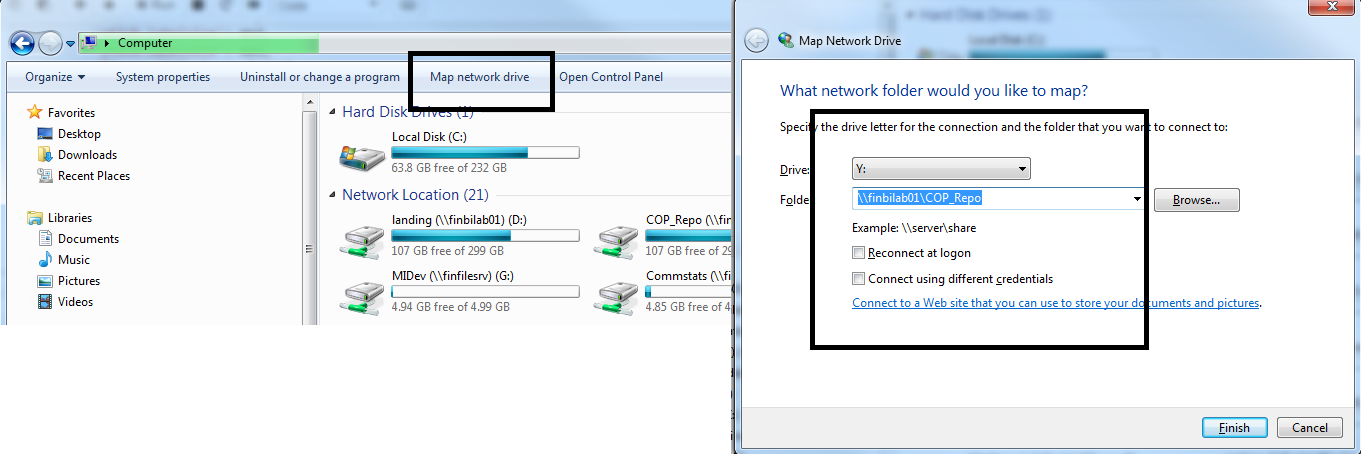

In [3]:
# Import Global Datasets - Datasets are stored in //finbilab01/COP_Repo/Code_Cache/Python/Datasets

midwest = pd.read_csv("J:/Code_Cache/Python/Datasets/midwest_filter.csv")
df = pd.read_csv("J:/Code_Cache/Python/Datasets/mpg_ggplot2.csv")
mt = pd.read_csv("J:/Code_Cache/Python/Datasets/mtcars.csv")
iris = pd.read_csv("J:/Code_Cache/Python/Datasets/iris.csv")

FileNotFoundError: File b'J:/Code_Cache/Python/Datasets/midwest_filter.csv' does not exist

In [19]:
# Check that midwest filtered dataset has loaded correctly
midwest.head(10)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161
5,566,BUREAU,IL,0.050,35688,713.760000,35157,50,65,195,...,3.275891,35107,98.372002,10.399635,14.158819,8.179287,11.008586,0,AAR,180.023052
6,567,CALHOUN,IL,0.017,5322,313.058824,5298,1,8,15,...,3.209601,5241,98.478016,15.149781,13.787761,12.932331,21.085271,0,LAR,129.021269
7,568,CARROLL,IL,0.027,16805,622.407407,16519,111,30,61,...,3.055727,16455,97.917287,11.710726,17.225462,10.027037,9.525052,0,AAR,168.395572
8,569,CASS,IL,0.024,13437,559.875000,13384,16,8,23,...,3.206799,13081,97.350599,13.875086,17.994784,11.914343,13.660180,0,AAR,160.436363
9,571,CHRISTIAN,IL,0.042,34418,819.476190,34176,82,51,89,...,3.089998,33788,98.169562,11.708299,16.320612,9.569700,11.490641,0,AAR,193.478750


In [20]:
# Check that the mpg_ggplot2 data has loaded correctly
df.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [36]:
# Check the mtcars file has loaded correctly
mt.head(20)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,Valiant,Valiant
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360
7,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,Merc 240D,Merc 240D
8,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,Merc 230,Merc 230
9,4.381780,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1,Merc 280,Merc 280


In [22]:
# Check the iris file has loaded correctly
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<h2>1. Scatter plot

__Scatter plot__ is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In matplotlib, you can conveniently do this using _plt.scatterplot()_.

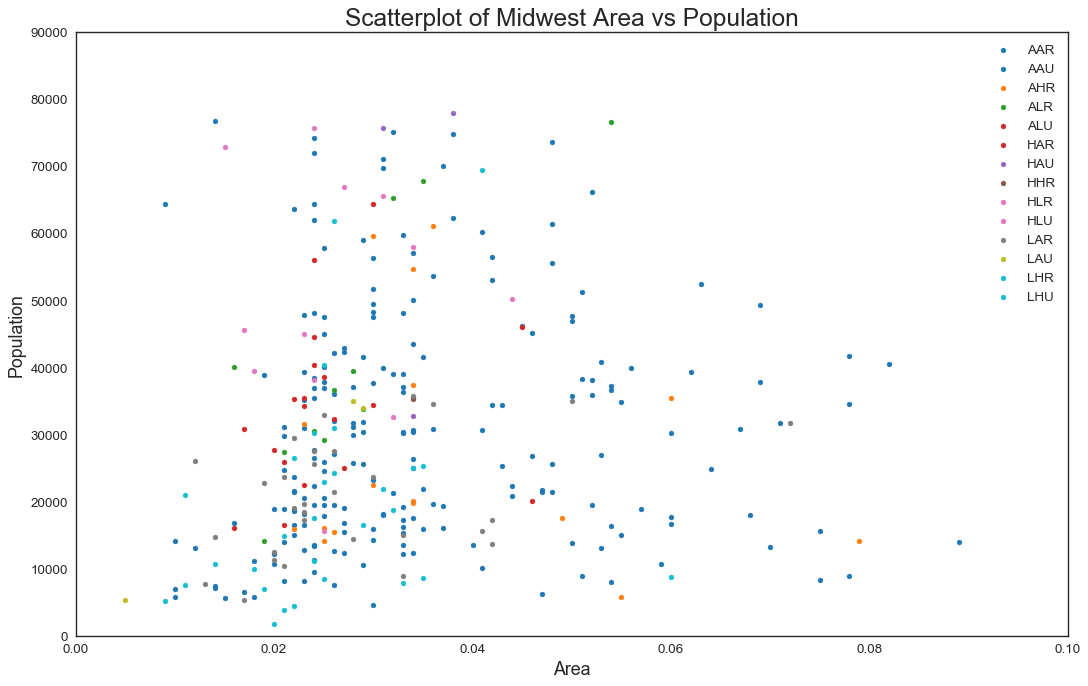

In [37]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

<h2>2. Bubble Plot with Encircling

Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the encircle() described in the code below.

In [24]:
    # Import plot specific packages

    from matplotlib import patches
    from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

In [1]:
# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 1: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', label=str(category), edgecolors='black', linewidths=.5)

# Step 2: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 3: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

NameError: name 'np' is not defined

<h2>3. Scatter plot with linear regression line of best fit

If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. The below plot shows how the line of best fit differs amongst various groups in the data. To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the_ hue='cyl'_ parameter from the _sns.lmplot()_ call below.

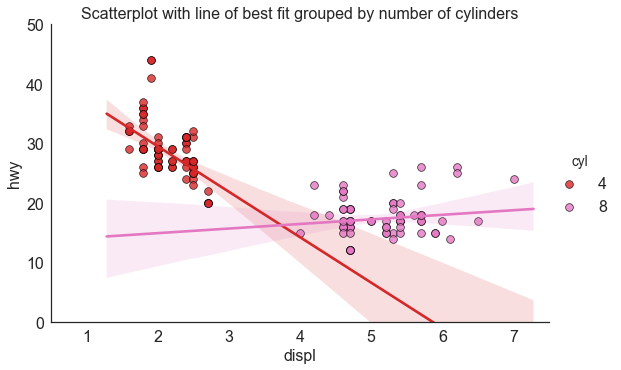

In [26]:
# Select Required Data
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=16)
plt.show()

Alternately, you can show the best fit line for each group in its own column. You can do this by setting the _col=groupingcolumn_ parameter inside the _sns.lmplot()_.

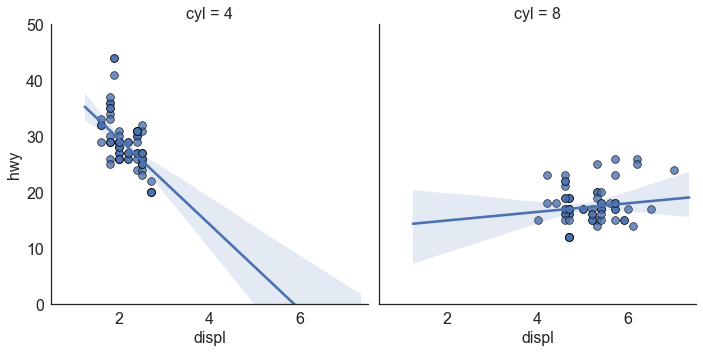

In [27]:
# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select,  
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

<h2>4. Jittering with stripplot

Often multiple datapoints have exactly the same _X_ and _Y_ values. As a result, multiple points get plotted over each other and hide. To avoid this, jitter the points slightly so you can visually see them. This is convenient to do using seaborn’s _stripplot()_.

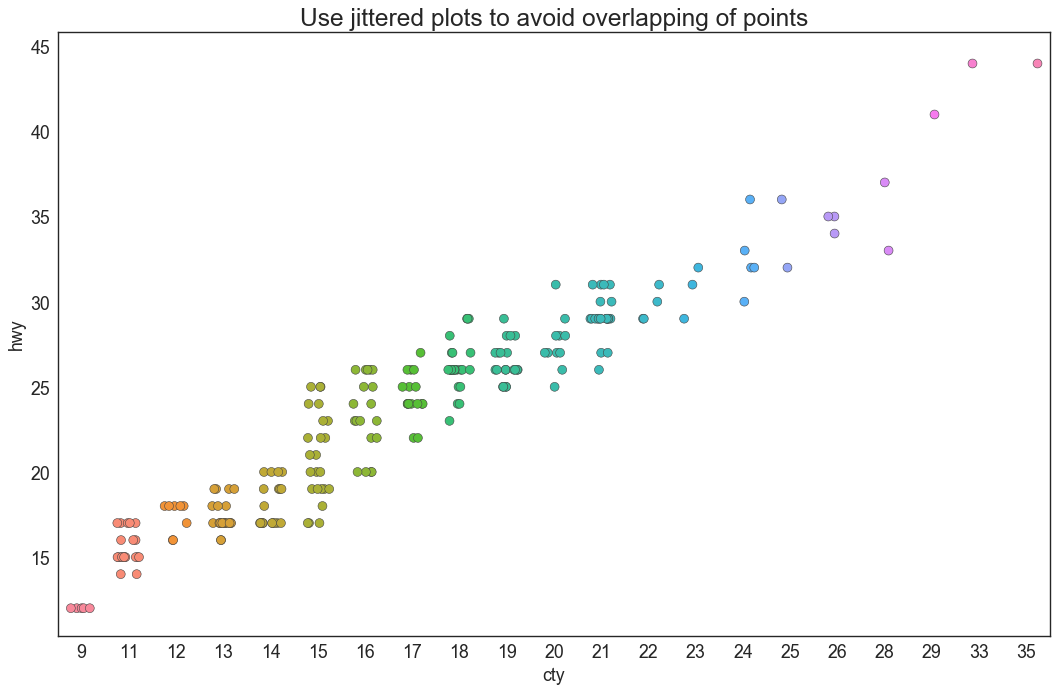

In [28]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

<h2>5. Counts Plot

Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. So, larger the size of the point more is the concentration of points around that.

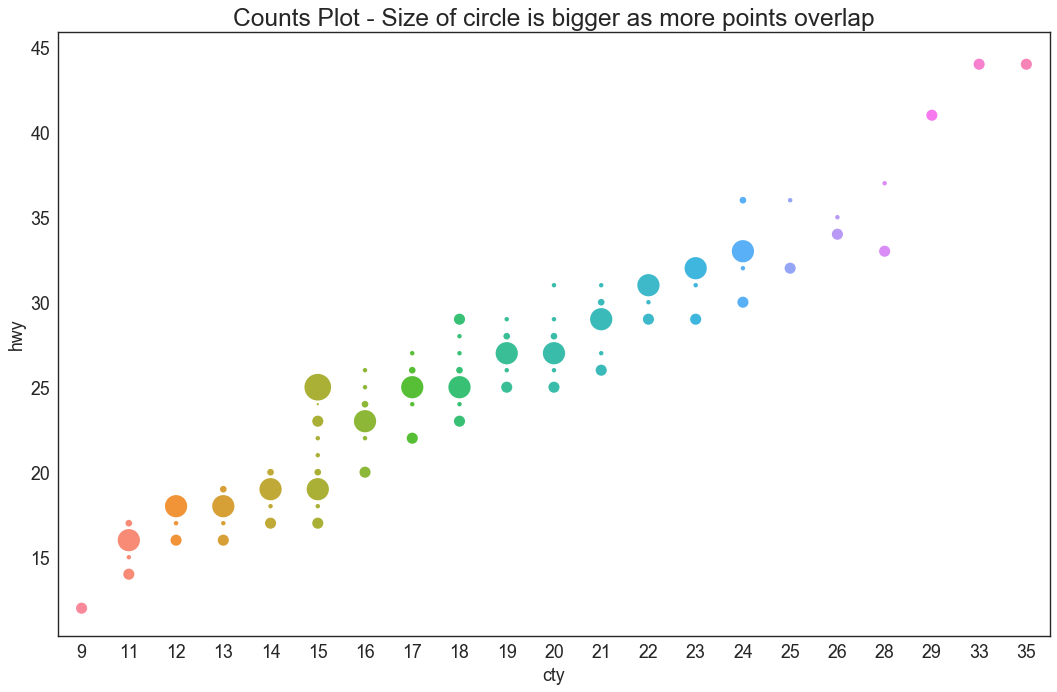

In [29]:
# Import Data Required for Plot
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

<h2>6. Marginal Histogram

__Marginal histograms__ have a histogram along the _X_ and _Y_ axis variables. This is used to visualize the relationship between the _X_ and _Y_ along with the univariate distribution of the X and the Y individually. This plot if often used in _exploratory data analysis (EDA)_.

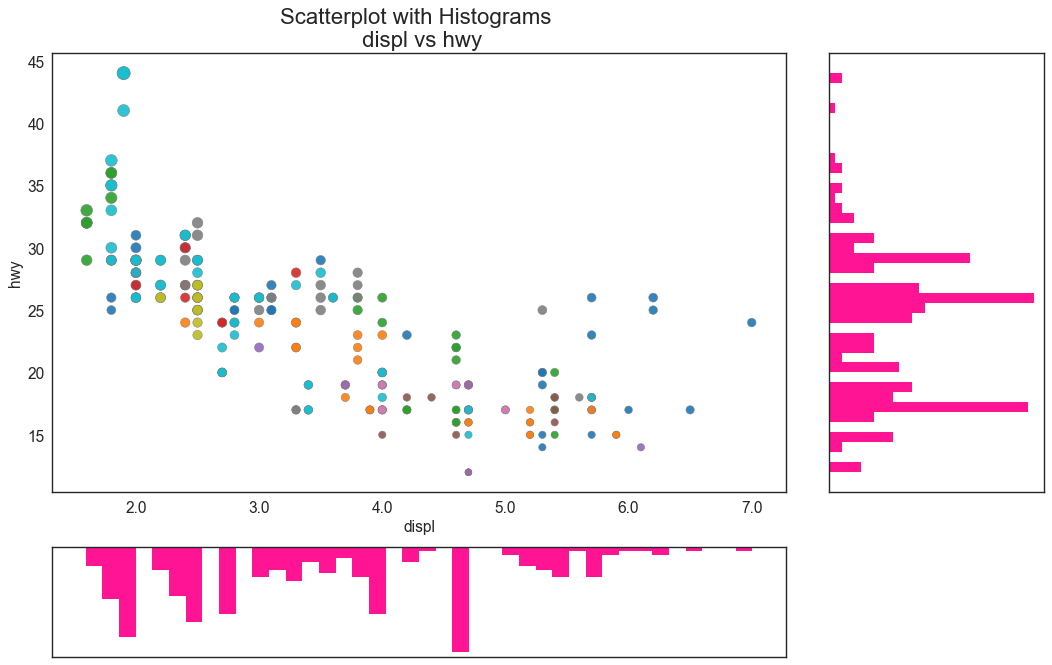

In [30]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

<h2>7. Marginal Boxplot

__Marginal boxplot__ serves a similar purpose as marginal histogram. However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the _X_ and the _Y_.

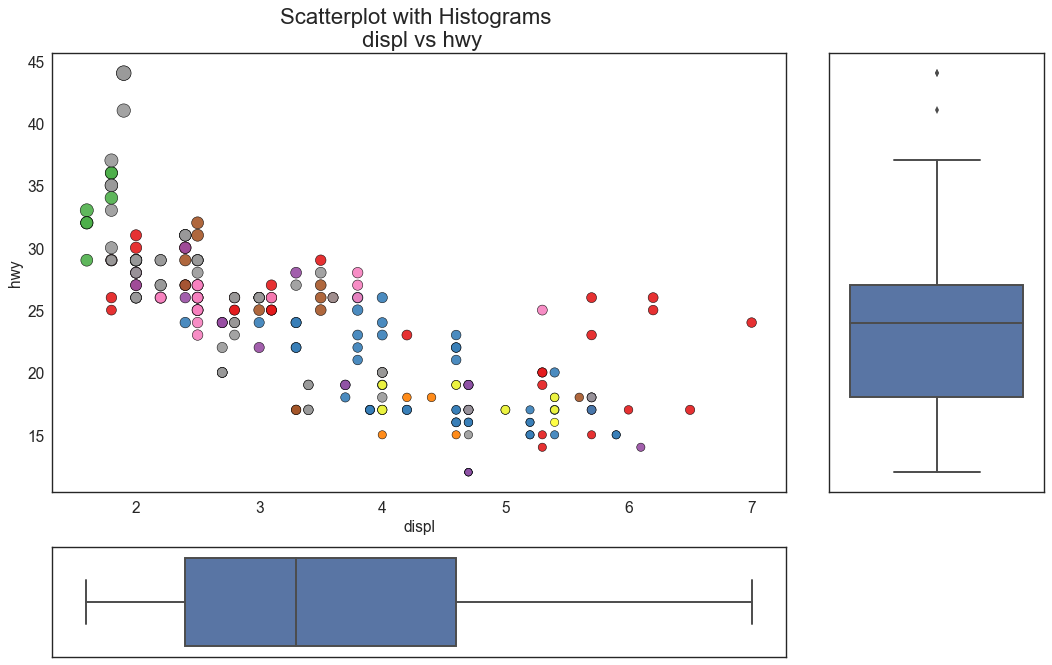

In [31]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

<h2>8. Correllogram

__Correlogram__ is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

In [38]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(mt.corr(), xticklabels=mt.corr().columns, yticklabels=mt.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

ValueError: Arrays were different lengths: 12 vs 0

<h2>9. Pairwise Plot

__Pairwise plot__ is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

<h3> Example 1 - PairPlot (Scatter by Species)

In [21]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(iris, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

NameError: name 'plt' is not defined

<h3> Example 2 - Pair Plot (Regular by Species)

In [23]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(iris, kind="reg", hue="species")
plt.show()

NameError: name 'plt' is not defined